Physics 474 - Spring 2023

Z-Boson Mass Peak and Width 

<font color='red'>Author: Elijah Mossman
    


________________________________________________________________________________
We will be looking at hypothetical data from a "collider detector" that measures particle energies and momentum coming from interactions of colliding beams in the detector centeral region. The  "event data" from this hypothetical experiment are measurements of the resulting electron and positron energies and momentum vectors in a particle detector, hopefully from the decay $Z \rightarrow e^+ \; e^-$. 

The data given here represent measurments of the energies that are NOT smeared by finite detector energy resolution (i.e. these are perfect energy measurments). In real life the reconstructed mass distribution would broadened, or smeared, by finite energy measurement resolution of the detector. To fit the data you would need to use a monte carlo simulation to smear the measured energies drawn from the Breit-wigner with some resolution function appropriate to your detector and then fit that smeared function to the reconstructed data. We will be picking this back up near the end of the semester! 


The goal of the Lab is to

- take those measured values from the detector data and reconstruct the distribution of the reconstructed invariant mass using the equation:

$m^2 = 2(E_1E_2-\vec{p}_1 \cdot \vec{p}_2)$ 

- fit the reconstructed mass data distribution to a Breit-Wigner distribution $\cal{M}_{bw}$

$\Large \cal{M}_{bw}(m;m_0,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}$

to get the best-fit central mass ($m_0$) and width(FWHM) $(\Gamma)$ parameters  as well as the confidence intervals for the 2 parameters and the 2-D joint confidence region.


___________________________________________________________________
Part 1 (4 pts)

Look at the comma-separated-variable text file 'Z->e+e-_Data_500.csv' to see the format of the data described in the first few lines of the file.

You are asked to
- read in the data file 'Z->e+e-_Data_500.csv'. 
- make histogram distributions of the 4 variables for each particle (8 total)
- the distribution of the reconstruced inavriant mass
- print how many total events there are



Total Events for particle 1:  625


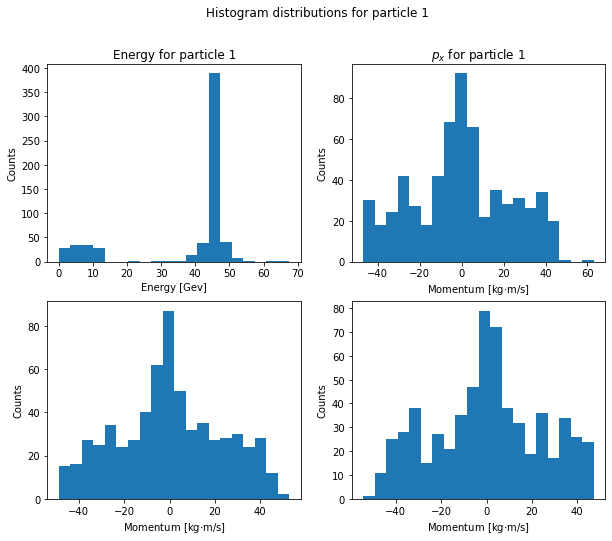

<Figure size 432x288 with 0 Axes>

In [127]:
# your code...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = 'Z-_e+e-_Data_500.csv'
df = pd.read_csv(filename)

plt.figure(figsize=(10,8))
plt.suptitle("Histogram distributions for particle 1")
#Energy
plt.subplot(2,2,1)
plt.hist(df['E1'],20)
plt.title("Energy for particle 1")
plt.xlabel("Energy [Gev]")
plt.ylabel("Counts")

#p_x
plt.subplot(2,2,2)
plt.hist(df['P1_x'],20)
plt.title(r"$p_x$ for particle 1")
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

#p_y
plt.subplot(2,2,3)
plt.hist(df['P1_y'],20)
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

#p_z
plt.subplot(2,2,4)
plt.hist(df['P1_z'],20)
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

print("Total Events for particle 1: ", len(df['E1']))

plt.show()
plt.tight_layout()

Total Events for particle 2:  625


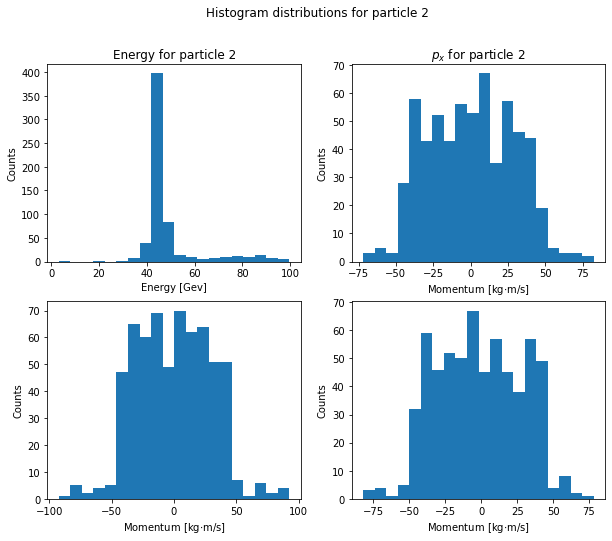

<Figure size 432x288 with 0 Axes>

In [129]:
plt.figure(figsize=(10,8))
plt.suptitle("Histogram distributions for particle 2")
#Energy
plt.subplot(2,2,1)
plt.hist(df['E2'],20)
plt.title("Energy for particle 2")
plt.xlabel("Energy [Gev]")
plt.ylabel("Counts")

#p_x
plt.subplot(2,2,2)
plt.hist(df['P2_x'],20)
plt.title(r"$p_x$ for particle 2")
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

#p_y
plt.subplot(2,2,3)
plt.hist(df['P2_y'],20)
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

#p_z
plt.subplot(2,2,4)
plt.hist(df['P2_z'],20)
plt.xlabel(r"Momentum [kg$\cdot$m/s]")
plt.ylabel("Counts")

print("Total Events for particle 2: ", len(df['E2']))

plt.show()
plt.tight_layout()

_______________________________________________________________
made the following plots
- side-by-side subplots with E1 and E2
- Scatter plot of E2 vs E1

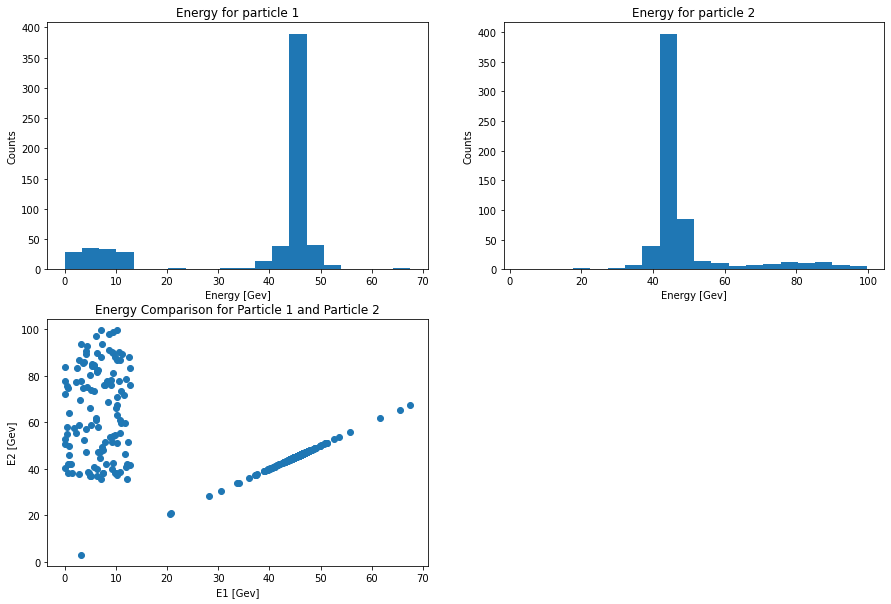

In [130]:
# your code...
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(df['E1'],20)
plt.title("Energy for particle 1")
plt.xlabel("Energy [Gev]")
plt.ylabel("Counts")

plt.subplot(2,2,2)
plt.hist(df['E2'],20)
plt.title("Energy for particle 2")
plt.xlabel("Energy [Gev]")
plt.ylabel("Counts")

plt.subplot(2,2,3)
plt.scatter(df['E1'], df['E2'])
plt.title("Energy Comparison for Particle 1 and Particle 2")
plt.xlabel("E1 [Gev]")
plt.ylabel("E2 [Gev]")

plt.tight_layout
plt.show()

_______________________________________________________________

- made appropriate cuts in the E2 vs E1 space to remove the "background" events
- plotted the reconstructed invariant mass for the "signal" events on linear yscale and log yscale
- printed the number of "signal" events

Number of 'signal' Events =  500


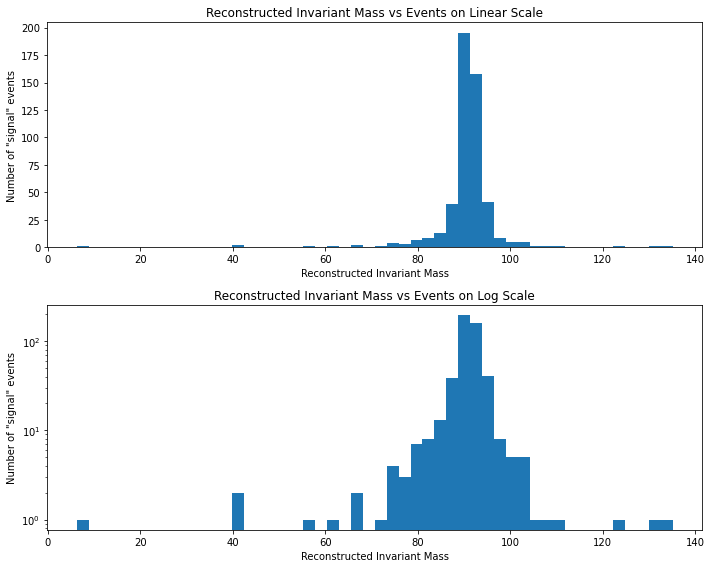

In [5]:
# your code...
cut_E1 = (df['E1'] > 18) | (df['E2'] < 20)


p1_dot_p2 = (df['P1_x']*df['P2_x']) + (df['P1_y']*df['P2_y']) + (df['P1_z']*df['P2_z'])
inv_mass = np.sqrt(2 * (df['E1'] * df['E2'] - p1_dot_p2))

plt.figure(figsize = (10,8))
plt.subplot(2, 1, 1)
cut_inv_mass = inv_mass[cut_E1]
plt.hist(cut_inv_mass, 50)
plt.ylabel('Number of "signal" events')
plt.xlabel('Reconstructed Invariant Mass')
plt.title("Reconstructed Invariant Mass vs Events on Linear Scale")

plt.subplot(2, 1, 2)
plt.hist(cut_inv_mass, 50)
plt.yscale('log')
plt.ylabel('Number of "signal" events')
plt.xlabel('Reconstructed Invariant Mass')
plt.title("Reconstructed Invariant Mass vs Events on Log Scale")

plt.tight_layout()

print("Number of 'signal' Events = ", len(cut_inv_mass))

def breit_wigner(m, m0, gamma):
    return (1/np.pi)*( (gamma / 2) / ( (m - m0)**2 + (gamma / 2)**2))

_______________________________________________________________
Used the signal events and the values 

$M_Z = 91.1876 \, Gev/c^2$ <br>
$\Gamma_Z = 2.4952 \, GeV/c^2$

- plotted the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV 
- made the same plot for the data but with errorbars = $\sqrt{N}$ and the Breit-Wigner theory distribution normalized to the total numer of signal data events.
- printed the number of "signal" data events total, signal data events from 80-100 GeV, signal theory events from 80-100 GeV


Signal data events total:  500
Signal data events from 80-100 GeV: 468


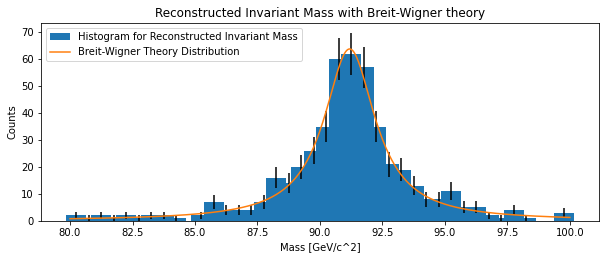

In [109]:
# your code...
m_z = 91.1876 #GeV/c^2
gamma_z = 2.4952 #GeV/c^2
tot_number_events = np.sqrt(len(cut_inv_mass))

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
n, b = np.histogram(cut_inv_mass, bins=40, range=(80,100))

print("Signal data events total: ", 500)
print("Signal data events from 80-100 GeV:", n.sum())

N0 = n.sum()
b_c = .5*(b[1:] + b[:-1])
w = b[1] - b[0]
thry = n *w *breit_wigner(b_c, m_z, gamma_z)
plt.bar(b_c, n, yerr=np.sqrt(n), label="Histogram for Reconstructed Invariant Mass")

m = np.linspace(80, 100, 500)
thry_smooth = len(cut_inv_mass) * w * breit_wigner(m, m_z, gamma_z)
plt.errorbar(m, thry_smooth, label="Breit-Wigner Theory Distribution")
plt.title("Reconstructed Invariant Mass with Breit-Wigner theory")
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Counts")
plt.legend()

______________________________________________________________________
We fit the signal events reconstructed invariant mass data to find the best-fit central mass $m_0$ and width $\Gamma$ in two ways
- binned $\chi^2$ 
- un-binned method of maximum likelihood (MML)

for the binned $\chi^2$ we used
- binned data: 40 bins from 80-100 GeV
- theory = Breit-wigner normalized to the entire number of signal events (not the number from 80-100 GeV)
- we used the integral approximation: predicted number in a bin = Thry(bin-center) * bin_width
- errors for each bin based on theory (i.e. $\sigma_i = \sqrt{N_{thry}}$)

for the MML method
- un-binned data 
- minimize the negative Log likelihood

we did the following
- printed the best-fit central mass and width for both fits
- plotted the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV with errorbars = $\sqrt{N_{data}}$
- on same plot showed the best-fit theory curve for both fits


Chi Squared fitted mass:  91.19283075264357
Chi Squared fitted width:  2.762988778648119
MML fitted mass:  91.17849639188202
MML fitted width:  2.4807502812947013


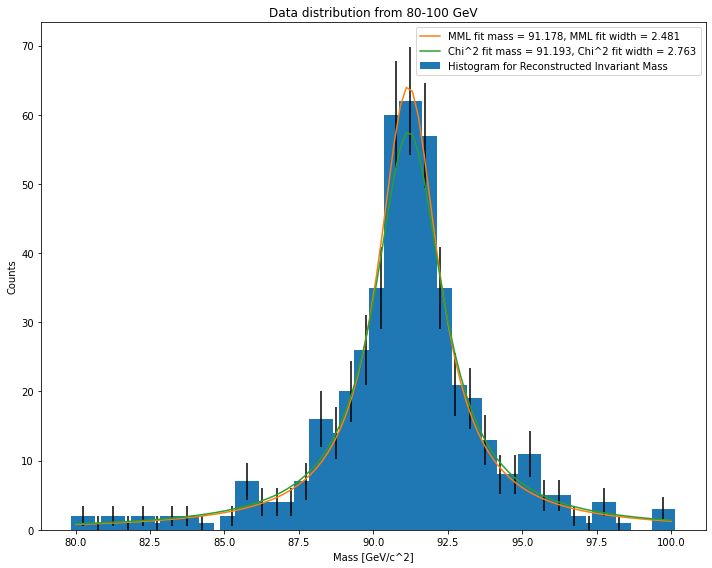

In [123]:
# your code...
from scipy.optimize import minimize

plt.figure(figsize=(10,8))
n, b = np.histogram(cut_inv_mass, 40, range = (80,100))
plt.bar(b_c, n, yerr=np.sqrt(n), label="Histogram for Reconstructed Invariant Mass")
b_c = .5*(b[1:] + b[:-1])
w = b[1] - b[0]



def chi_square_1(mass_parameters, bin_times, data):
    mass = mass_parameters[0]
    width = mass_parameters[1]
    N_norm = mass_parameters[2]
    bw = bin_times[1] - bin_times[0]
    thry = N_norm * bw * breit_wigner(bin_times, mass, width)
    chi2 = (data - thry)**2 / (np.absolute(thry))
    return chi2.sum()


mass0 = 90,2,500
bnds = ((60,110),(1,10),(250,1000))
res1 = minimize(chi_square_1, mass0, bounds=bnds, args=(b_c,n))

mass_fit1 = res1.x[0]
width_fit1 = res1.x[1]


# log -likelihood
def likelihood(mass_parameters, data):
    mass = mass_parameters[0]
    width = np.absolute(mass_parameters[1])
    p_i = breit_wigner(data,mass, width)
    L = -(np.log(p_i)).sum()
    return L

mass0 = 80.,5.
res = minimize(likelihood, mass0, bounds=((50,120),(1,3)),args=(cut_inv_mass))
mass_fit4 = res.x[0]
width_fit4 = res.x[1]
print("Chi Squared fitted mass: ", mass_fit1)
print("Chi Squared fitted width: ", width_fit1)
print("MML fitted mass: ", mass_fit4)
print("MML fitted width: ", width_fit4)
m = np.linspace(b.min(), b.max(), 100)
thry_ll = N *w *breit_wigner(m, mass_fit4, width_fit4)
plt.plot(m, thry_ll, label="MML fit mass = 91.178, MML fit width = 2.481")
plt.plot(m, N*w*breit_wigner(m, mass_fit1, width_fit1), label="Chi^2 fit mass = {:.3f}, Chi^2 fit width = {:.3f}".format(mass_fit1, width_fit1))
plt.title("Data distribution from 80-100 GeV")
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()

_________________________________________________________________
Used the best-fit parameters from MML fit to show
- data distribution with errorbars in 40 bins from 80-100 GeV
- smooth plot of best-fit theory curve
- best fit values on plot
- reduced $\chi^2$ and $\chi^2$ probability on plot
- residual plot as subplot below the main plot


Chi squared:  0.8794212249313528
Probability chi squared:  0.6811719833623325


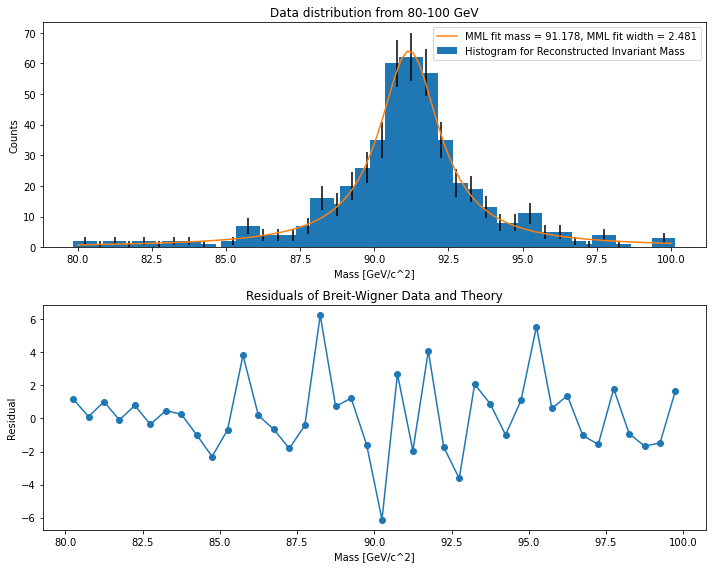

In [118]:
# your code...
import scipy.stats as st

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
n, b = np.histogram(cut_inv_mass, 40, range = (80,100))
plt.bar(b_c, n, yerr=np.sqrt(n), label="Histogram for Reconstructed Invariant Mass")
b_c = .5*(b[1:] + b[:-1])
w = b[1] - b[0]

thry = 500 *w *breit_wigner(b_c, mass_fit4, width_fit4)
residuals = n - thry
chi2 = ((n - thry)**2 / np.absolute(thry)).sum()
dof = len(n) - 2
prob = st.chi2.sf(chi2,dof)

print("Chi squared: ", chi2/dof)
print("Probability chi squared: ", prob)

plt.plot(m, thry_ll, label="MML fit mass = 91.178, MML fit width = 2.481")
plt.title("Data distribution from 80-100 GeV")
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Counts")
plt.legend()


plt.subplot(2,1,2)
plt.plot(b_c, residuals, marker='o')
plt.title("Residuals of Breit-Wigner Data and Theory")
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Residual")


plt.tight_layout()

_____________________________________________________________________________
calculated and showed the $-2 \Delta log \cal{L}$

- calculated the $-2 \Delta log \cal{L}$
- showed a 'contourf' in 500 levels for the $-2 \Delta log \cal{L}$
- showed the 68% and 95% 2D joint confidenece regions on the plot
- showed the best-fit point
- showed the true value from part 2c above

In [15]:
# your code...
n_bins = 100
negll_map = np.zeros((n_bins, n_bins))
M = np.linspace(90,92, n_bins)
W = np.linspace(2,3, n_bins)
for i in range(n_bins):
    for j in range(n_bins):
        negll_map[j, i] = likelihood((M[i], W[j]),cut_inv_mass)


In [16]:
negll_min = res.fun
negll_map_i = 2*(negll_map - negll_min)
negll = np.minimum(negll_map_i, 16.*np.ones((n_bins, n_bins)))

No handles with labels found to put in legend.


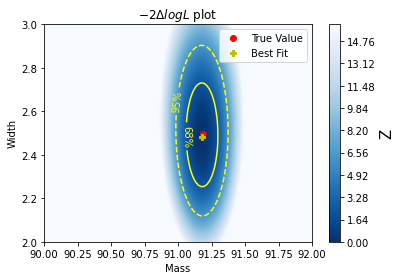

In [18]:
X,Y = np.meshgrid(M,W)
plt.contourf(X,Y,negll,500,cmap="Blues_r")
cbar = plt.colorbar()
levels = [2.30, 6.17]
CS = plt.contour(X,Y,negll, levels,colors=['yellow','yellow'],linestyles=['solid','dashed'])


fmt = {}
strs = ['68%','95%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
plt.legend()
plt.clabel(CS,CS.levels,inline=True,fmt=fmt) #put strings into labels
cbar.set_label(r'Z',fontsize=15)

plt.plot(m_z,gamma_z,'ro',label="True Value")
plt.plot(mass_fit4, width_fit4, 'yP', label="Best Fit")
plt.title(r'$-2\Delta log L$ plot')
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Width [GeV/c^2]")
plt.legend()

_____________________________________________________________________________

used the $-2 \Delta log \cal{L}$ from above 

- made 2 invidual subplots, 1 for each parameter, of the $-2 \Delta log \cal{L}$ 
- marked the $\pm 1\sigma$ region on each plot for the 1D confidence region
- printed the best fit value and 1 sigma upper and lower range for each parameter

Best Fit Mass value: 91.178
1 sigma upper value for Mass: 91.253
1 sigma upper value for Mass: 91.111
Best Fit Width value: 2.481
1 sigma upper value for Width: 2.636
1 sigma lower value for Width: 2.333


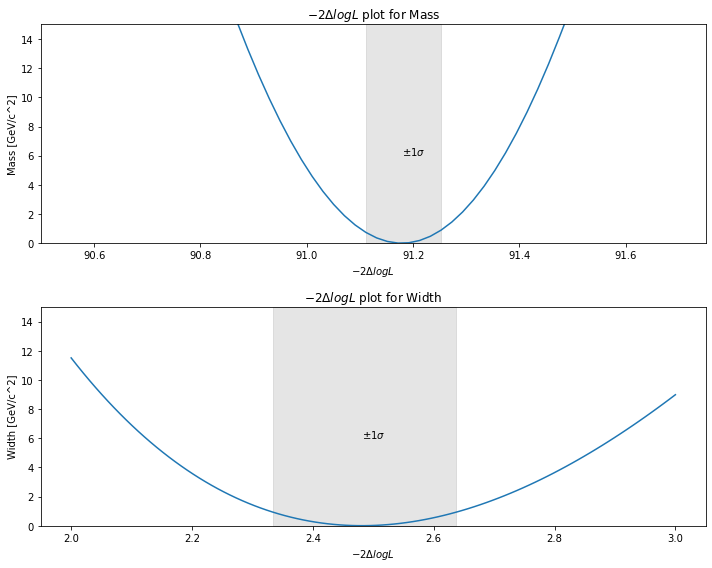

In [91]:
# your code...

negll_mass = np.zeros(n_bins)
negll_width = np.zeros(n_bins)
for j in range(n_bins):
    negll_mass[j] = negll[:,j].min()
    negll_width[j] = negll[j,:].min()

cut_mass = (negll_mass < 1.)
cut_width = (negll_width < 1.)
masses = M[cut_mass]
widths = W[cut_width]

width_lower = widths.min()
width_upper = widths.max()

mass_lower = masses.min()
mass_upper = masses.max()
print("Best Fit Mass value: {:.3f}". format(mass_fit4))
print("1 sigma upper value for Mass: {:.3f}". format(mass_upper))
print("1 sigma upper value for Mass: {:.3f}". format(mass_lower))
print("Best Fit Width value: {:.3f}". format(width_fit4))
print("1 sigma upper value for Width: {:.3f}". format(width_upper))
print("1 sigma lower value for Width: {:.3f}". format(width_lower))

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(M,negll_mass)
plt.ylim(0,15)
plt.xlim(90.50,91.75)
plt.fill_between([mass_lower, mass_upper],[15,15],alpha=.2,color='gray')
plt.text(mass_fit4,6,r'$\pm1\sigma$')
plt.title(r'$-2\Delta log L$ plot for Mass')
plt.xlabel(r'$-2\Delta log L$')
plt.ylabel("Mass [GeV/c^2]")


plt.subplot(2,1,2)
plt.plot(W,negll_width)
plt.ylim(0,15)
plt.fill_between([width_lower,width_upper],[15,15],alpha=.2,color='gray')
plt.text(width_fit4,6,r'$\pm1\sigma$')
plt.title(r'$-2\Delta log L$ plot for Width')
plt.xlabel(r'$-2\Delta log L$')
plt.ylabel("Width [GeV/c^2]")

# plt.plot(M, mass_negll_map_i)
plt.tight_layout()